In [115]:
from Precode import *
import numpy
    
data = np.load('AllSamples.npy')

In [116]:
k1,i_point1,k2,i_point2 = initial_S1('5780') # please replace 0111 with your last four digit of your ID"

Strategy 1: k and initial points


In [117]:
print(k1,i_point1,k2,i_point2)
print(type(i_point1))

3 [[2.80096609 1.03176348]
 [5.57009665 8.3870942 ]
 [1.713841   4.31350258]] 5 [[5.14468217 3.26589278]
 [3.13088669 6.30135711]
 [7.52963009 8.79617112]
 [8.60402994 8.76147163]
 [8.33664582 9.23795257]]
<class 'numpy.ndarray'>


In [118]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import sys

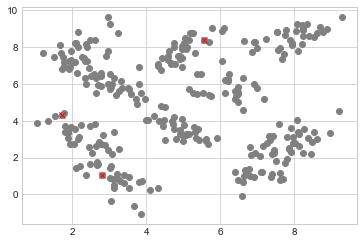

In [119]:
plt.plot(data[:,0], data[:,1], 'o', color='gray')
plt.plot(i_point1[:,0], i_point1[:,1], 'x', color='red')

In [120]:
def do_k_mean_one_iteration(data, centroid):
    cluster = [0] * len(data)
    num_points_in_cluster = [0] * len(centroid)
    sum_points_in_cluster = np.zeros((len(centroid), 2))
    centroid_next = np.zeros((len(centroid), 2))
    loss = 0

    #calculate euclidean distance and classify samples
    for i in range(len(data)):
        distance_arr = []
        
        for j in range(len(centroid)):
            distance = np.sum(np.square(data[i]-centroid[j]))
            distance_arr.append(distance)  
    
        loss += np.min(distance_arr)
        c = np.argmin(distance_arr)
        cluster[i] = c   
        num_points_in_cluster[c] += 1
        sum_points_in_cluster[c] += data[i]
   
    #update centroids
    for k in range(len(sum_points_in_cluster)):
        centroid_next[k] = sum_points_in_cluster[k]/num_points_in_cluster[k]     

    return centroid_next, loss
            
def do_k_mean(data, centroid):
    loss_arr = []
    centroid_curr = centroid
    
    while(True):
        centroid_next = centroid_curr
        centroid_curr, loss = do_k_mean_one_iteration(data, centroid_curr)
        loss_arr.append(loss) 
        if(np.var(centroid_next) == np.var(centroid_curr)):
            break    
        
    return centroid_curr, loss_arr

[[5.55524182 2.18980958]
 [6.49724962 7.52297293]
 [2.61946868 5.96519477]]
[2597.2228965140453, 1344.2088121596587, 1306.3153163841994, 1300.235510202875, 1295.3211579901754, 1294.298417485318]


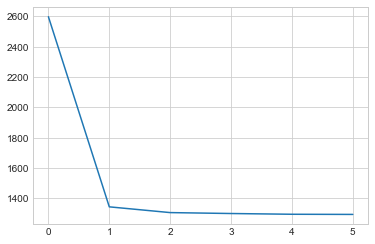

In [125]:
centroid, loss_arr = do_k_mean(data, i_point1)
print(centroid)
print(loss_arr)
plt.plot(range(len(loss_arr)), loss_arr)

[[5.46810558 2.23600141]
 [2.45162074 6.08990448]
 [5.44895368 6.72531296]
 [7.28498719 7.9788889 ]
 [8.25354035 8.87440762]]
[1462.7543343448829, 1255.3025580828019, 1143.5104479553158, 1110.2457783359735, 1104.0975181545464, 1100.5511132651463, 1099.096553802407, 1099.0498065192155]


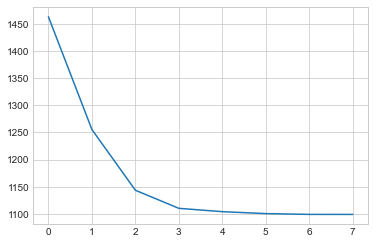

In [126]:
centroid, loss_arr = do_k_mean(data, i_point2)
print(centroid)
print(loss_arr)
plt.plot(range(len(loss_arr)), loss_arr)